# Часть 1

Сначала импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import random

Сохраняем содержимое файла в переменную df

In [2]:
df = pd.read_csv('test_task.csv')

In [3]:
df

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,1.0,279,10.971214,4.857810387061303
225,greetings,2.0,Кластер 2,sapphire grounds,1.0,335,1.160626,3.642819729434763
226,greetings,3.0,Кластер 3,entire ethical speakers,1.0,1782,7.985910,6.003699268483375
227,greetings,3.0,Кластер 3,courtesy textiles diameter,1.0,84,0.509490,4.151198803764073


Избавляемся от пустых строк:

In [4]:
df.dropna(inplace=True)

Получаем все возможные значения кластеров и областей из таблицы:

In [5]:
clusters = df['cluster_name'].unique()
areas = df['area'].unique()

Генерируем цвета для различных сочетаний областей и кластеров так, чтомы внутри одного кластера цвета были разными. Выбор цветов рандомный, получим словарь с цветовыми значениями, по которому затем заполняем новую колонку в таблице:

In [6]:
colors_schema = {}

for area in areas:
    unused = ['#9edae5', '#dbdb8d', '#c7c7c7', '#f7b6d2', '#c49c94', '#c5b0d5', '#ff9896', '#98df8a']
    for cluster in clusters:
        cluster_color = random.choice(unused)
        unused.remove(cluster_color)

        colors_schema[(area, cluster)] = cluster_color

In [7]:
def set_color(row):
     return colors_schema[(row['area'], row['cluster_name'])]
    
df['color'] = df.apply(lambda row: set_color(row), axis=1)

Избавляемся от лишней колонки и от дублирующихся строк

In [8]:
df.drop(columns=['good (1)'], inplace=True)
df.drop_duplicates(subset=['area', 'keyword'], inplace=True)

Меняем расположение колонок и сортируем:

In [9]:
df = df[['area', 'cluster', 'cluster_name', 'keyword', 'x', 'y', 'count', 'color']]
df.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending=[True, True, True, False], inplace=True)

Сохраняем в csv файл:

In [10]:
df.to_csv('formatted_data.csv')

# Часть 2

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

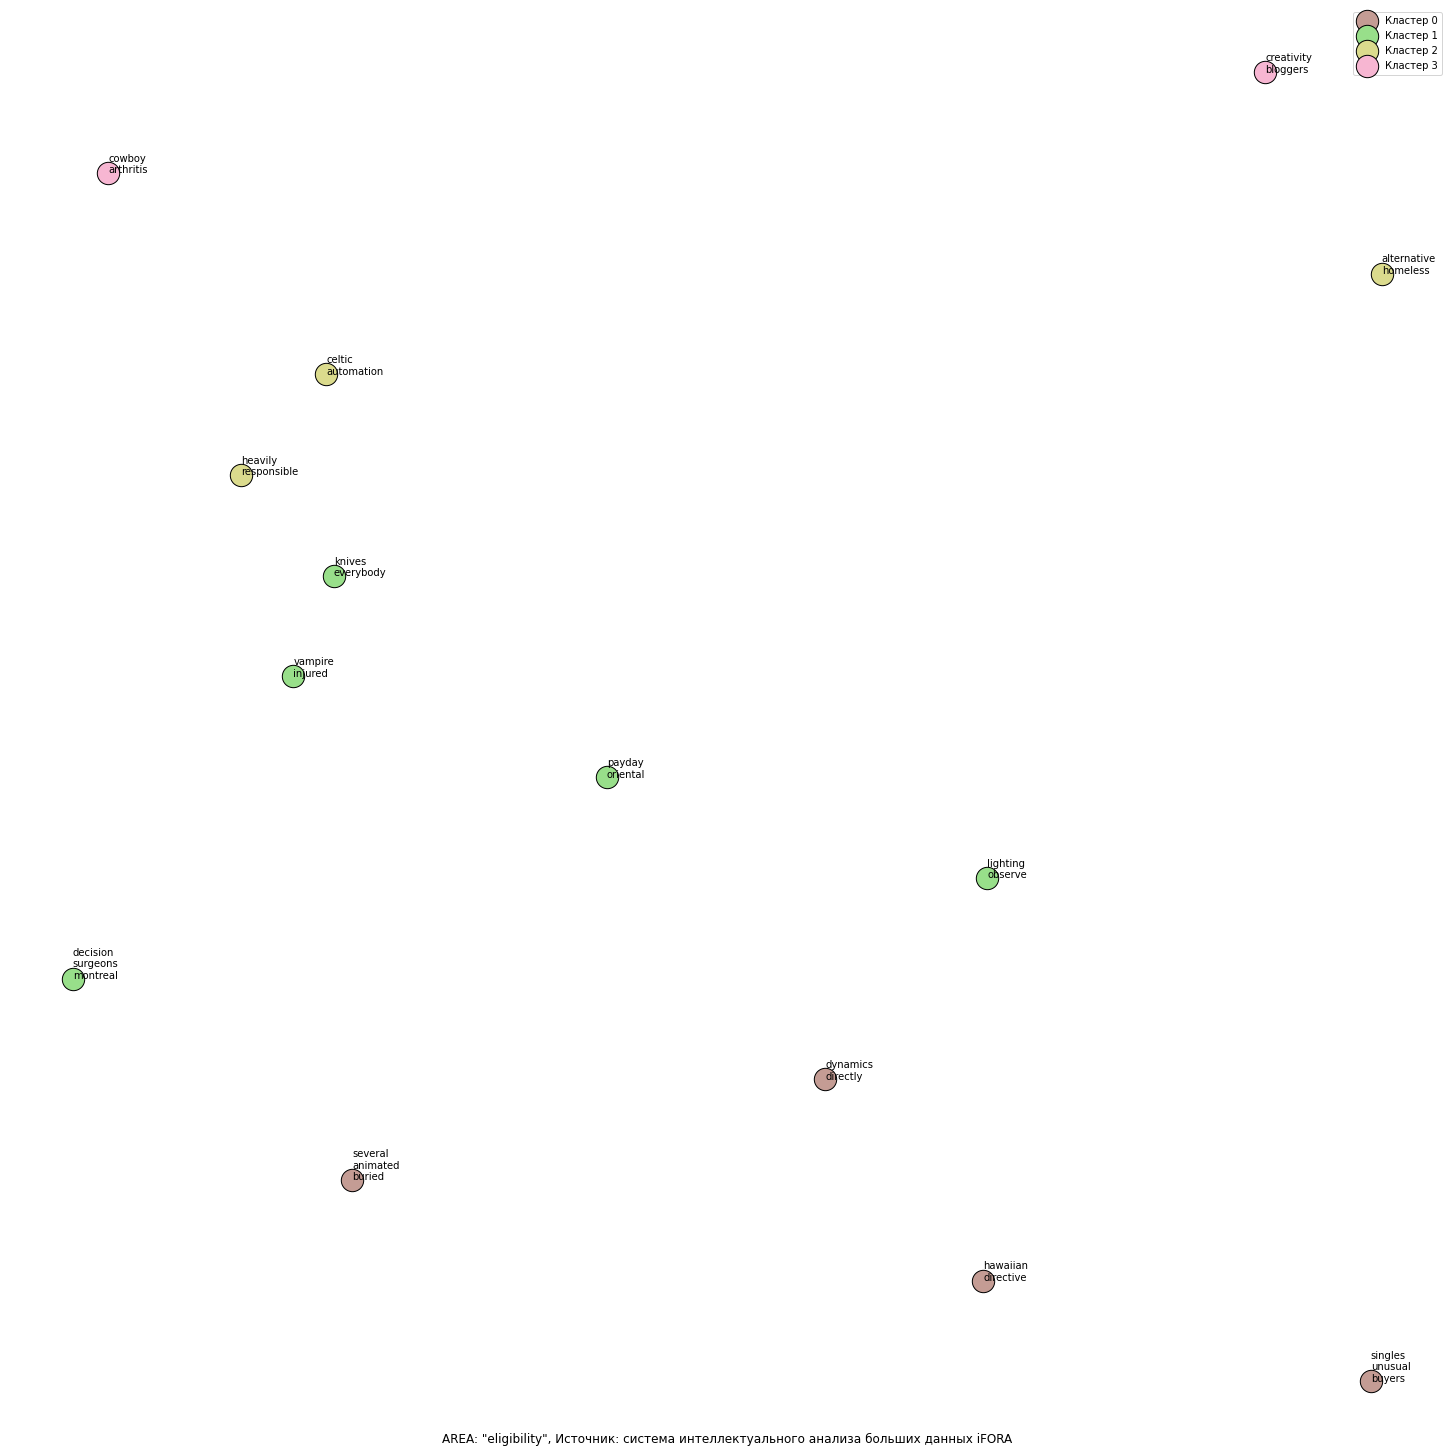

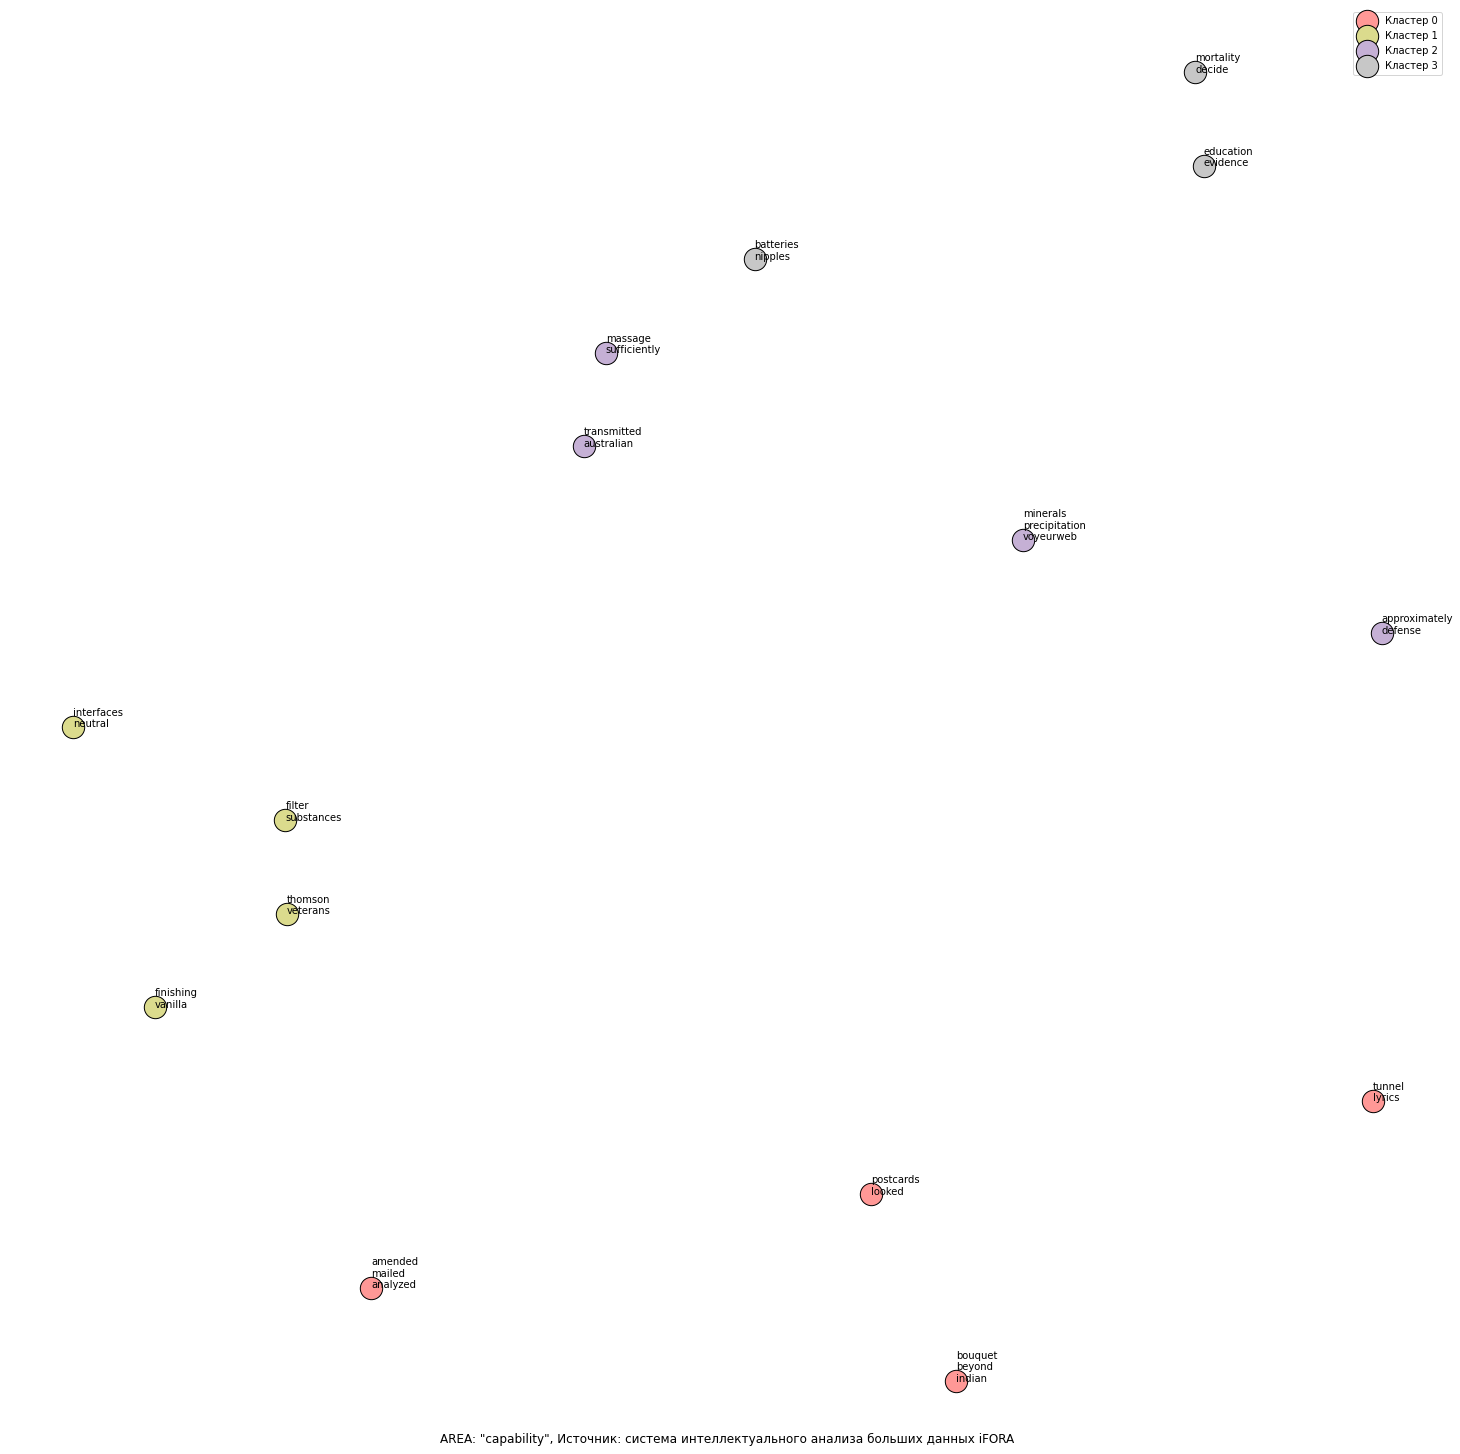

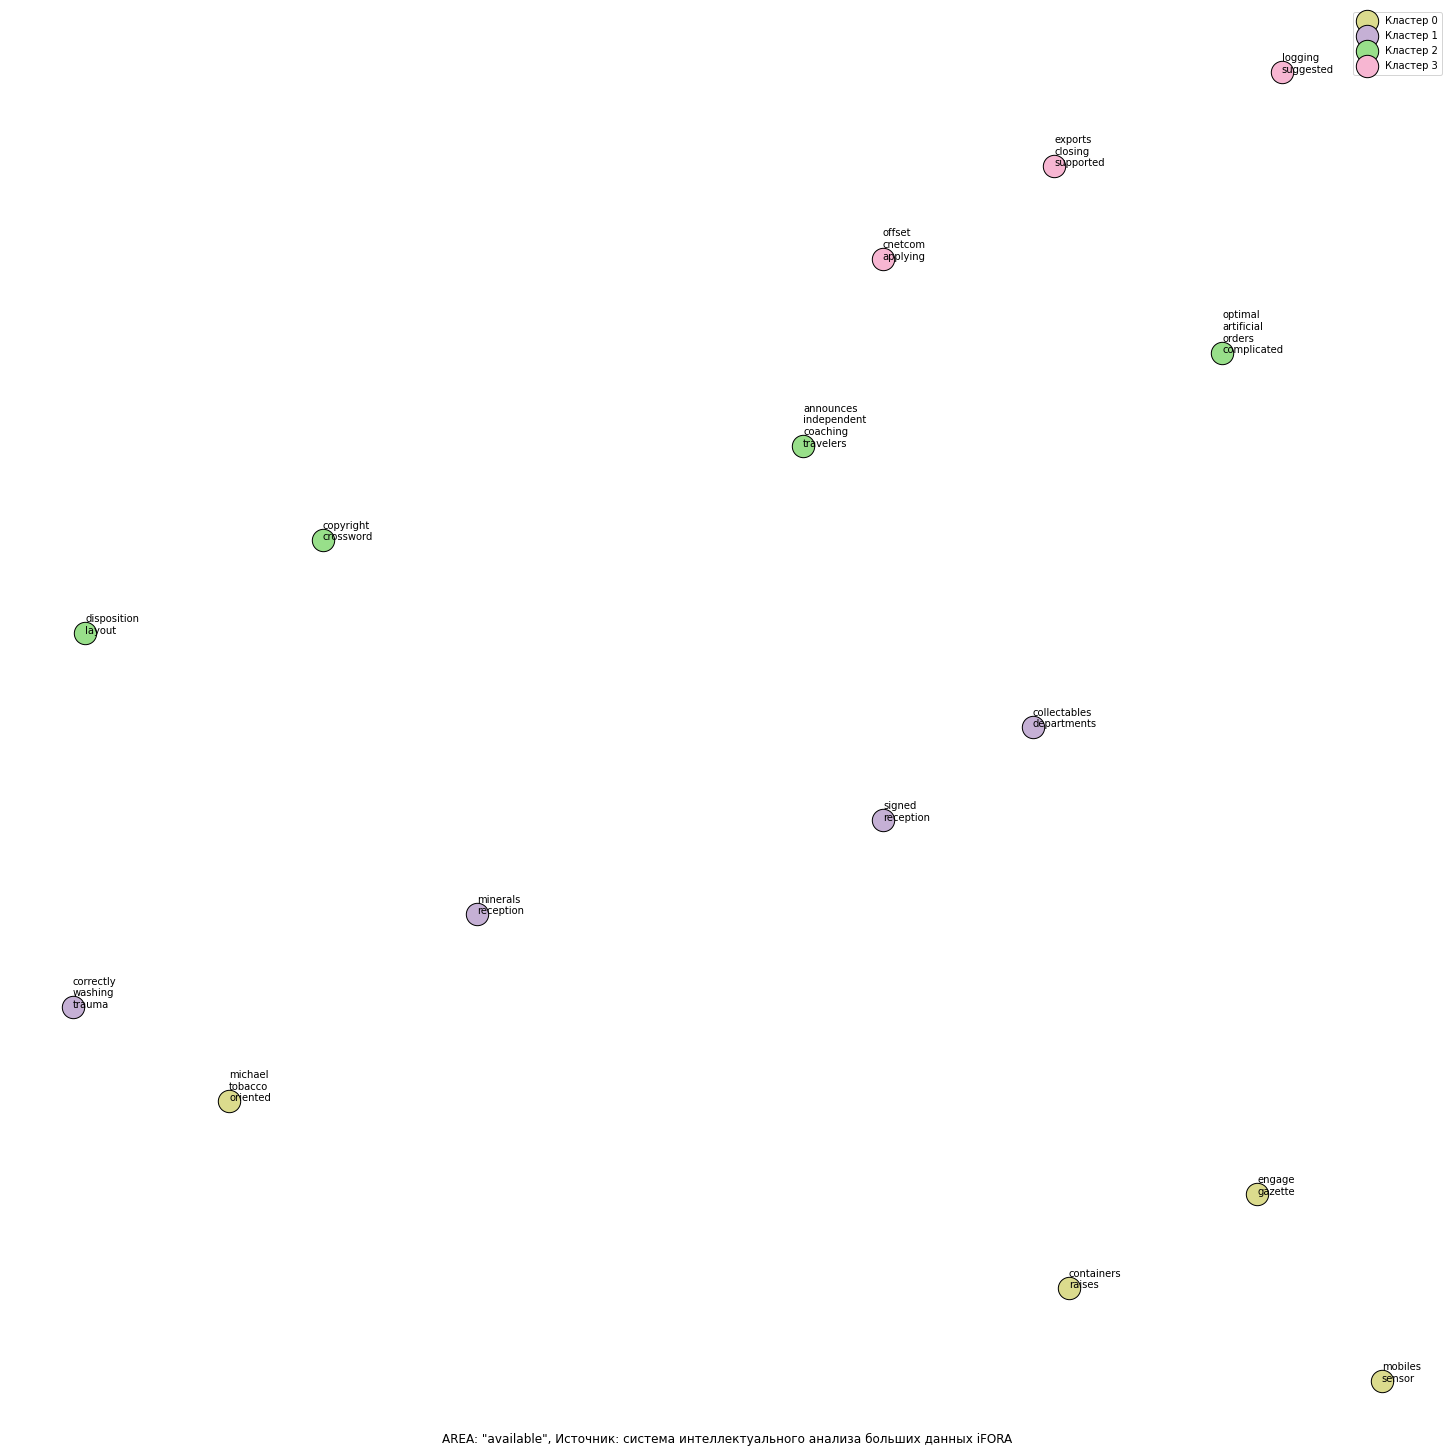

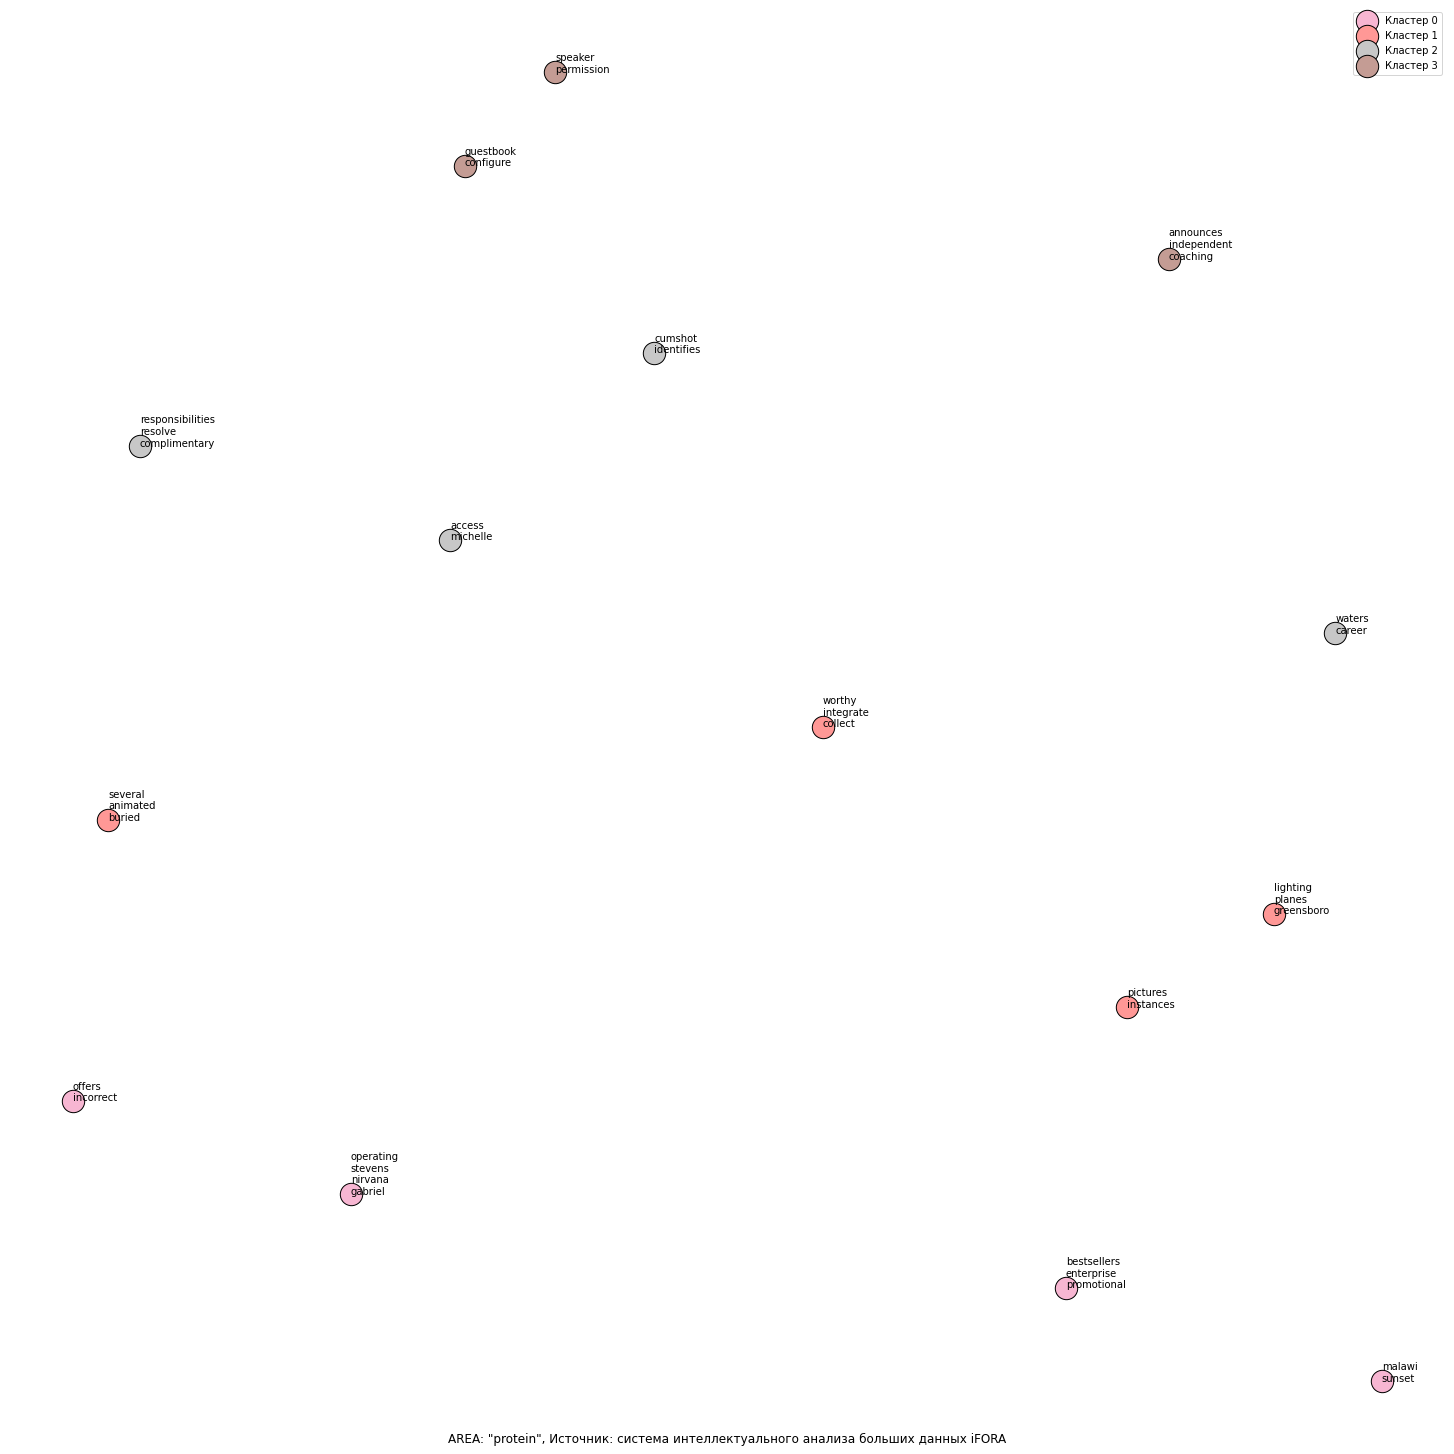

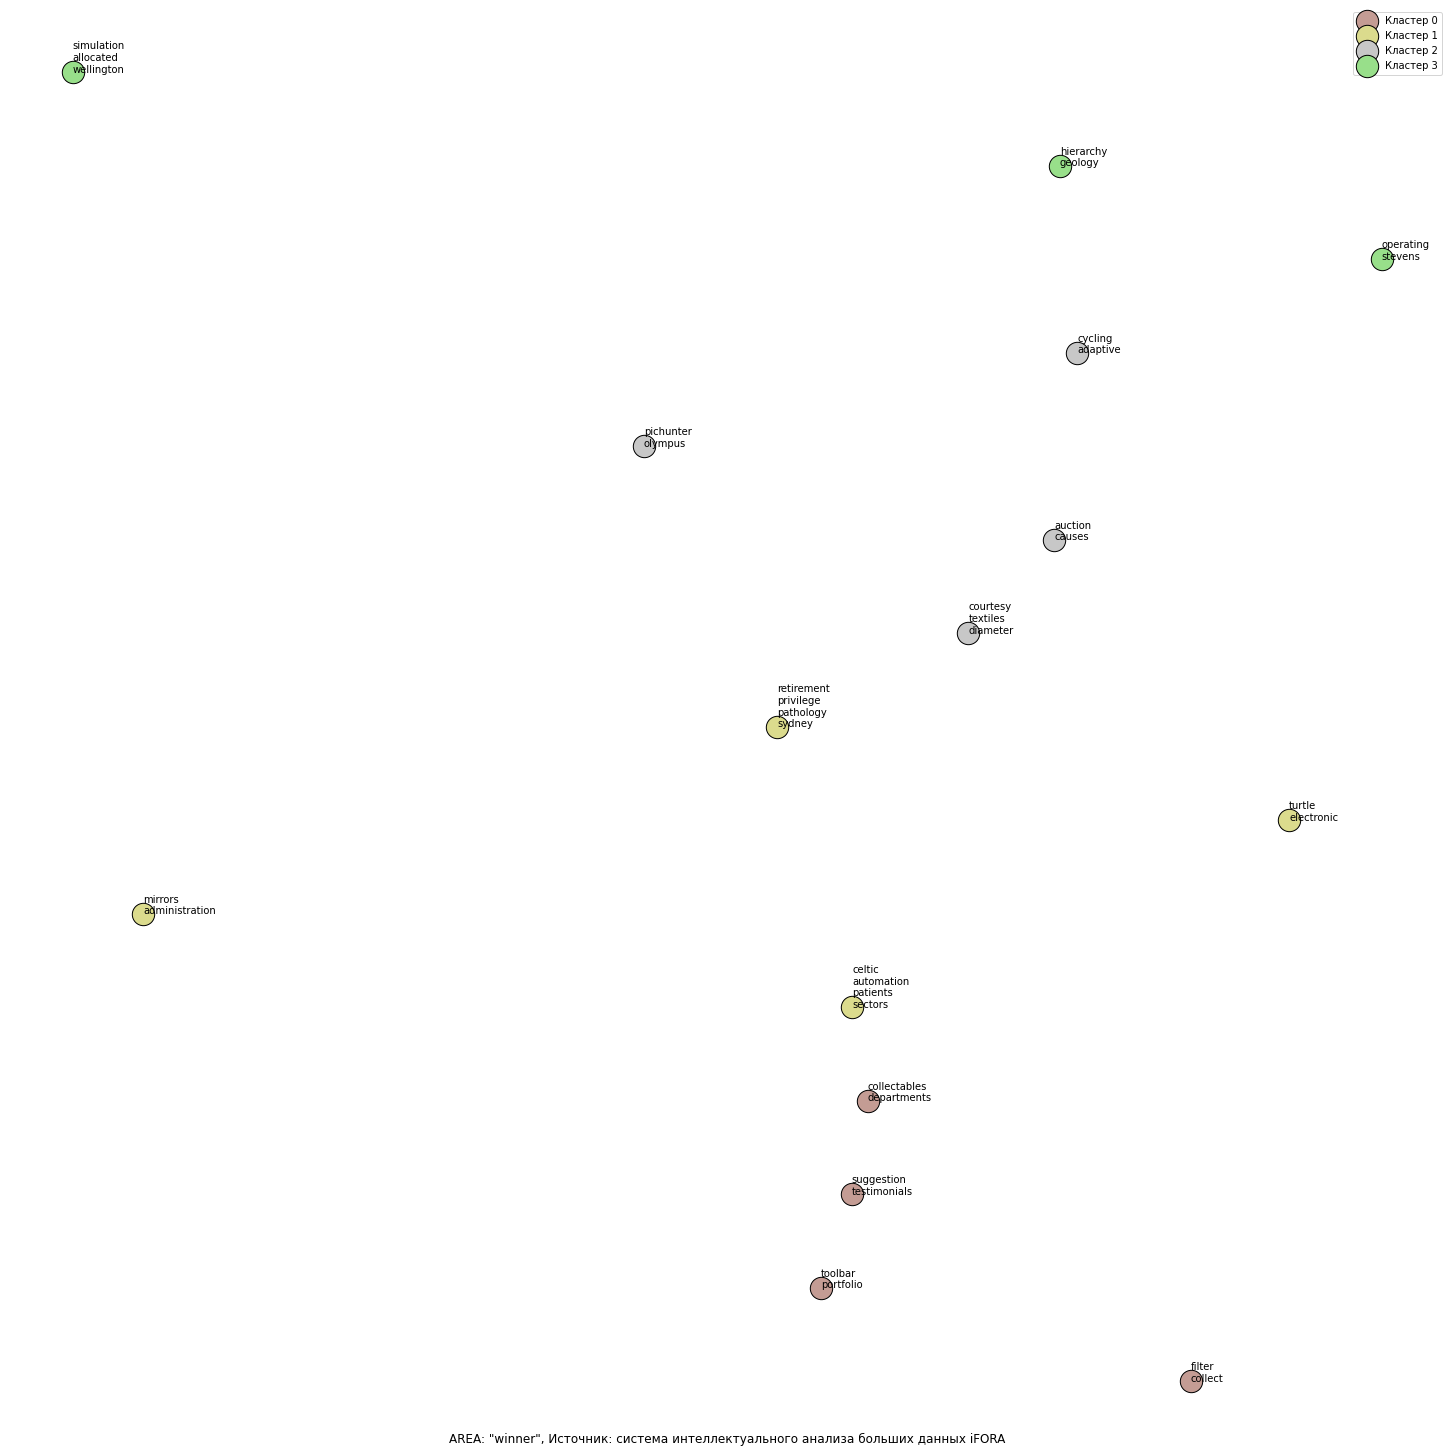

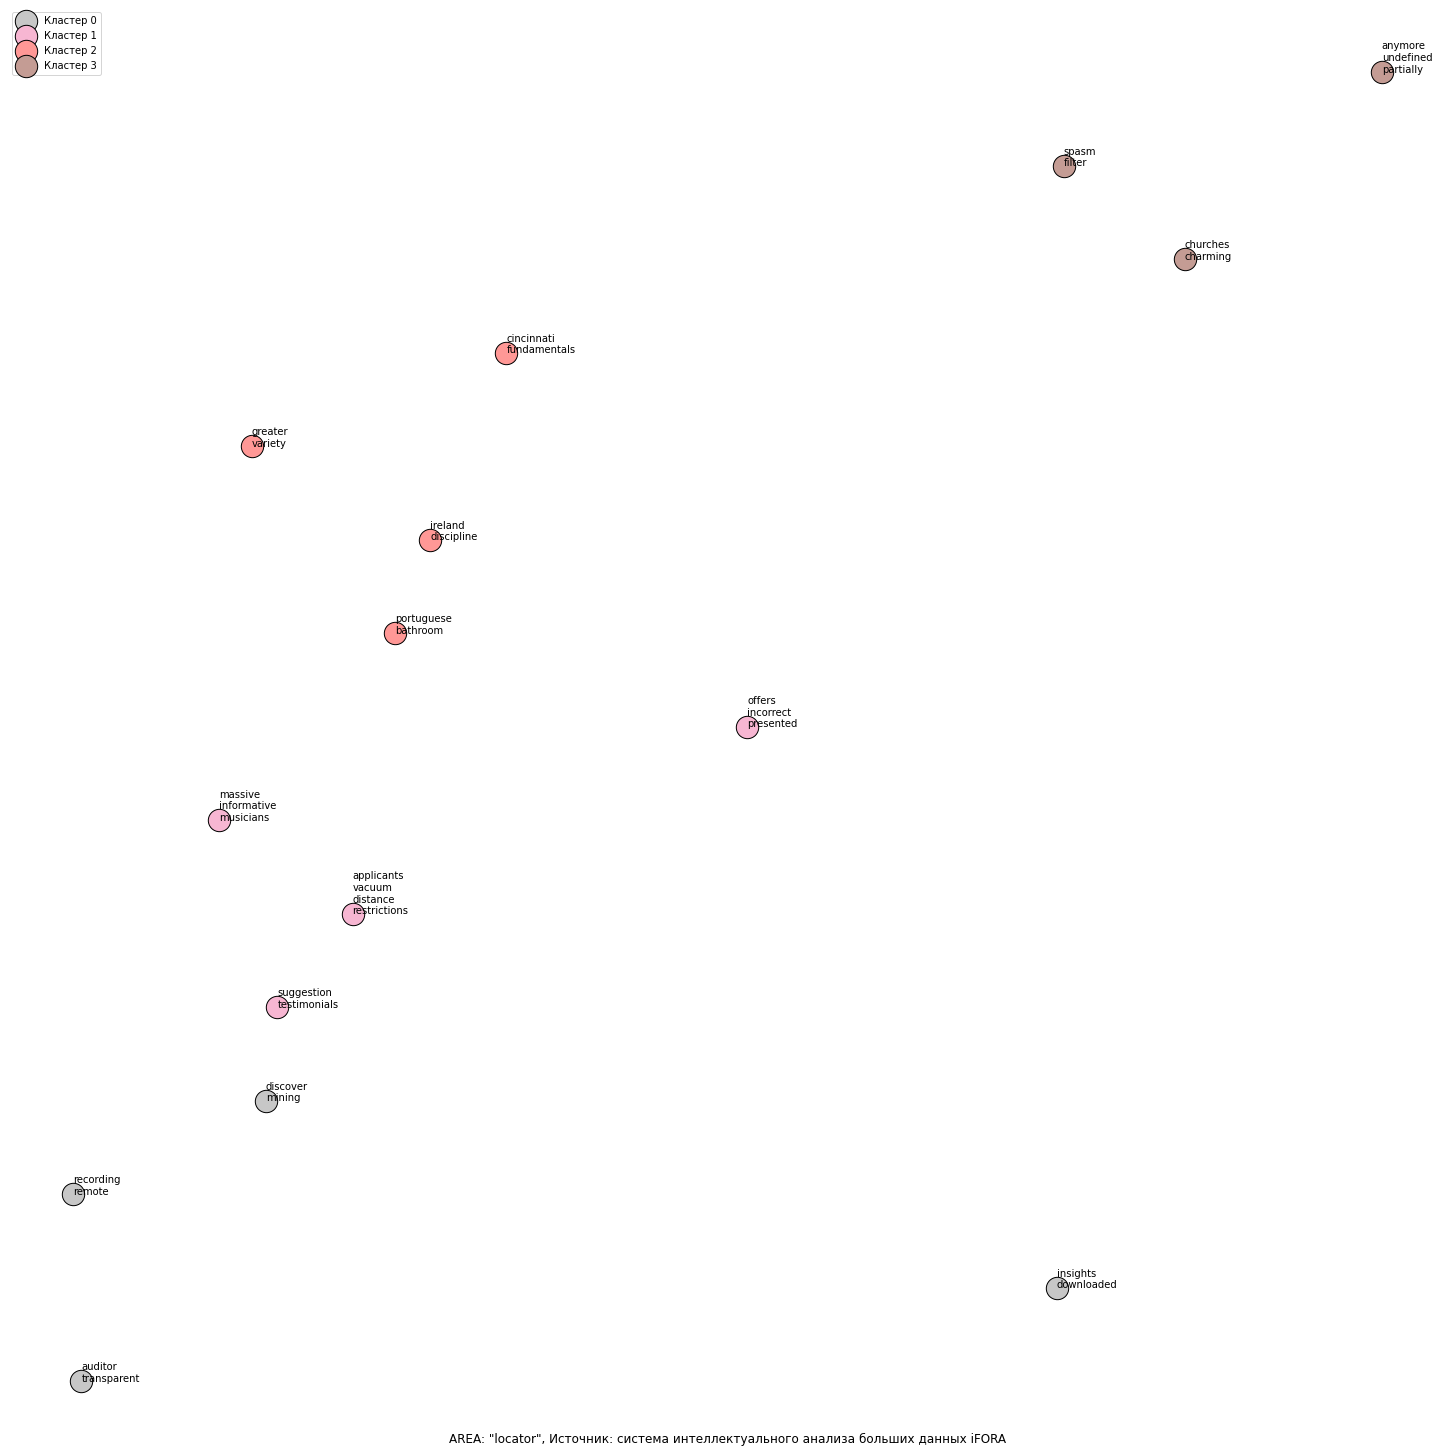

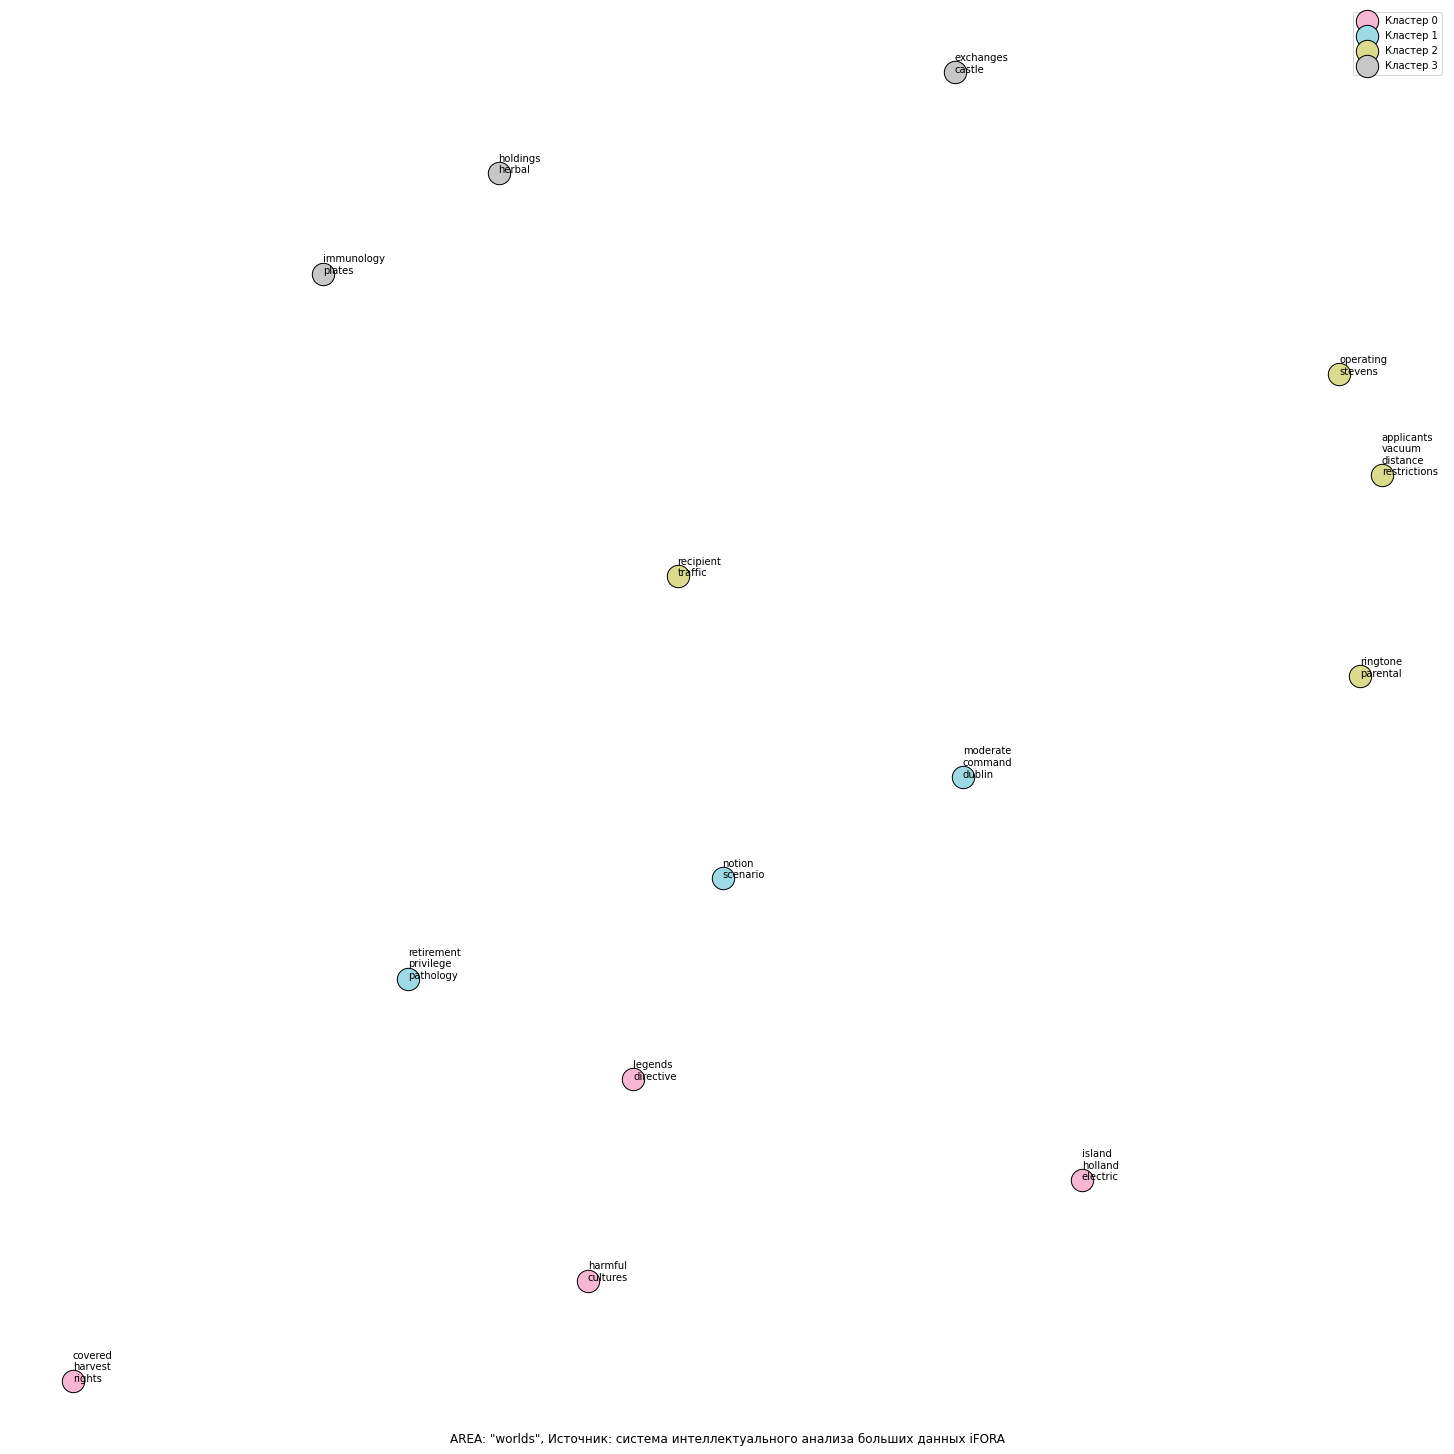

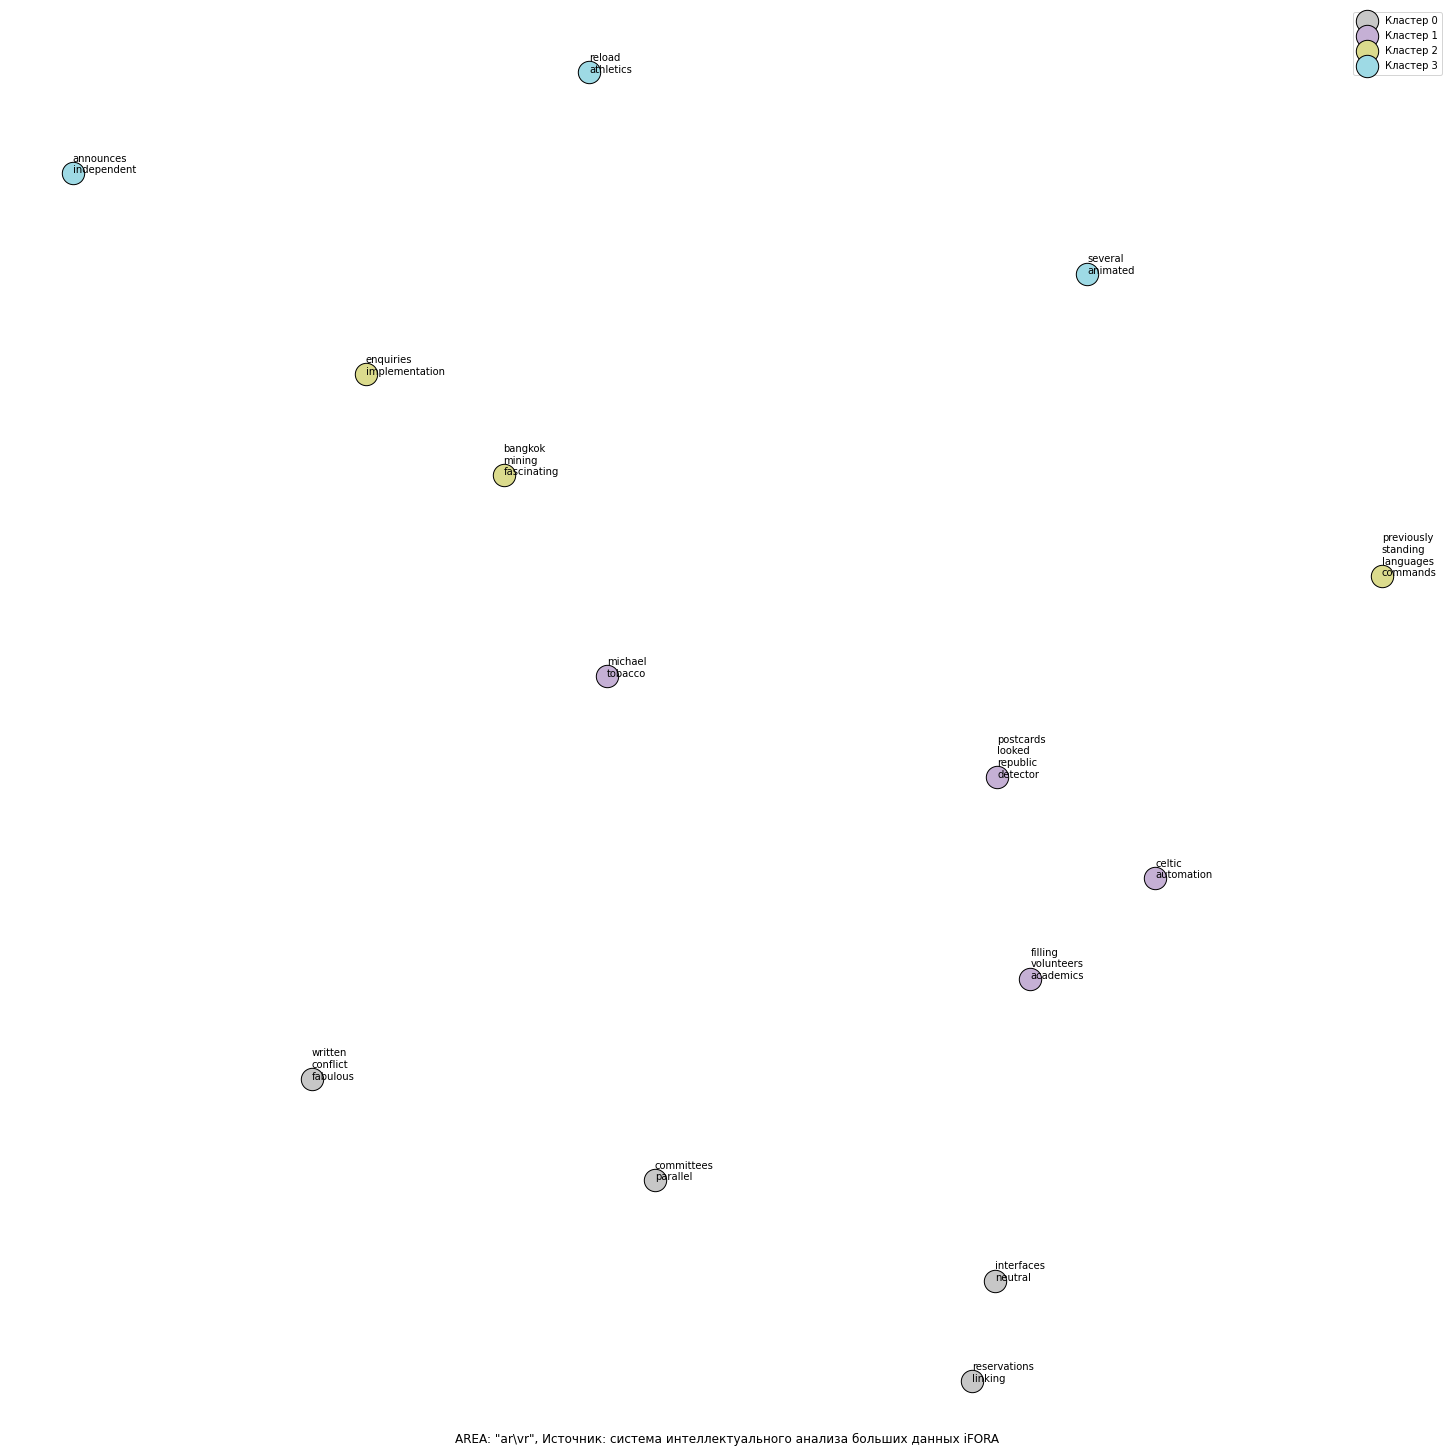

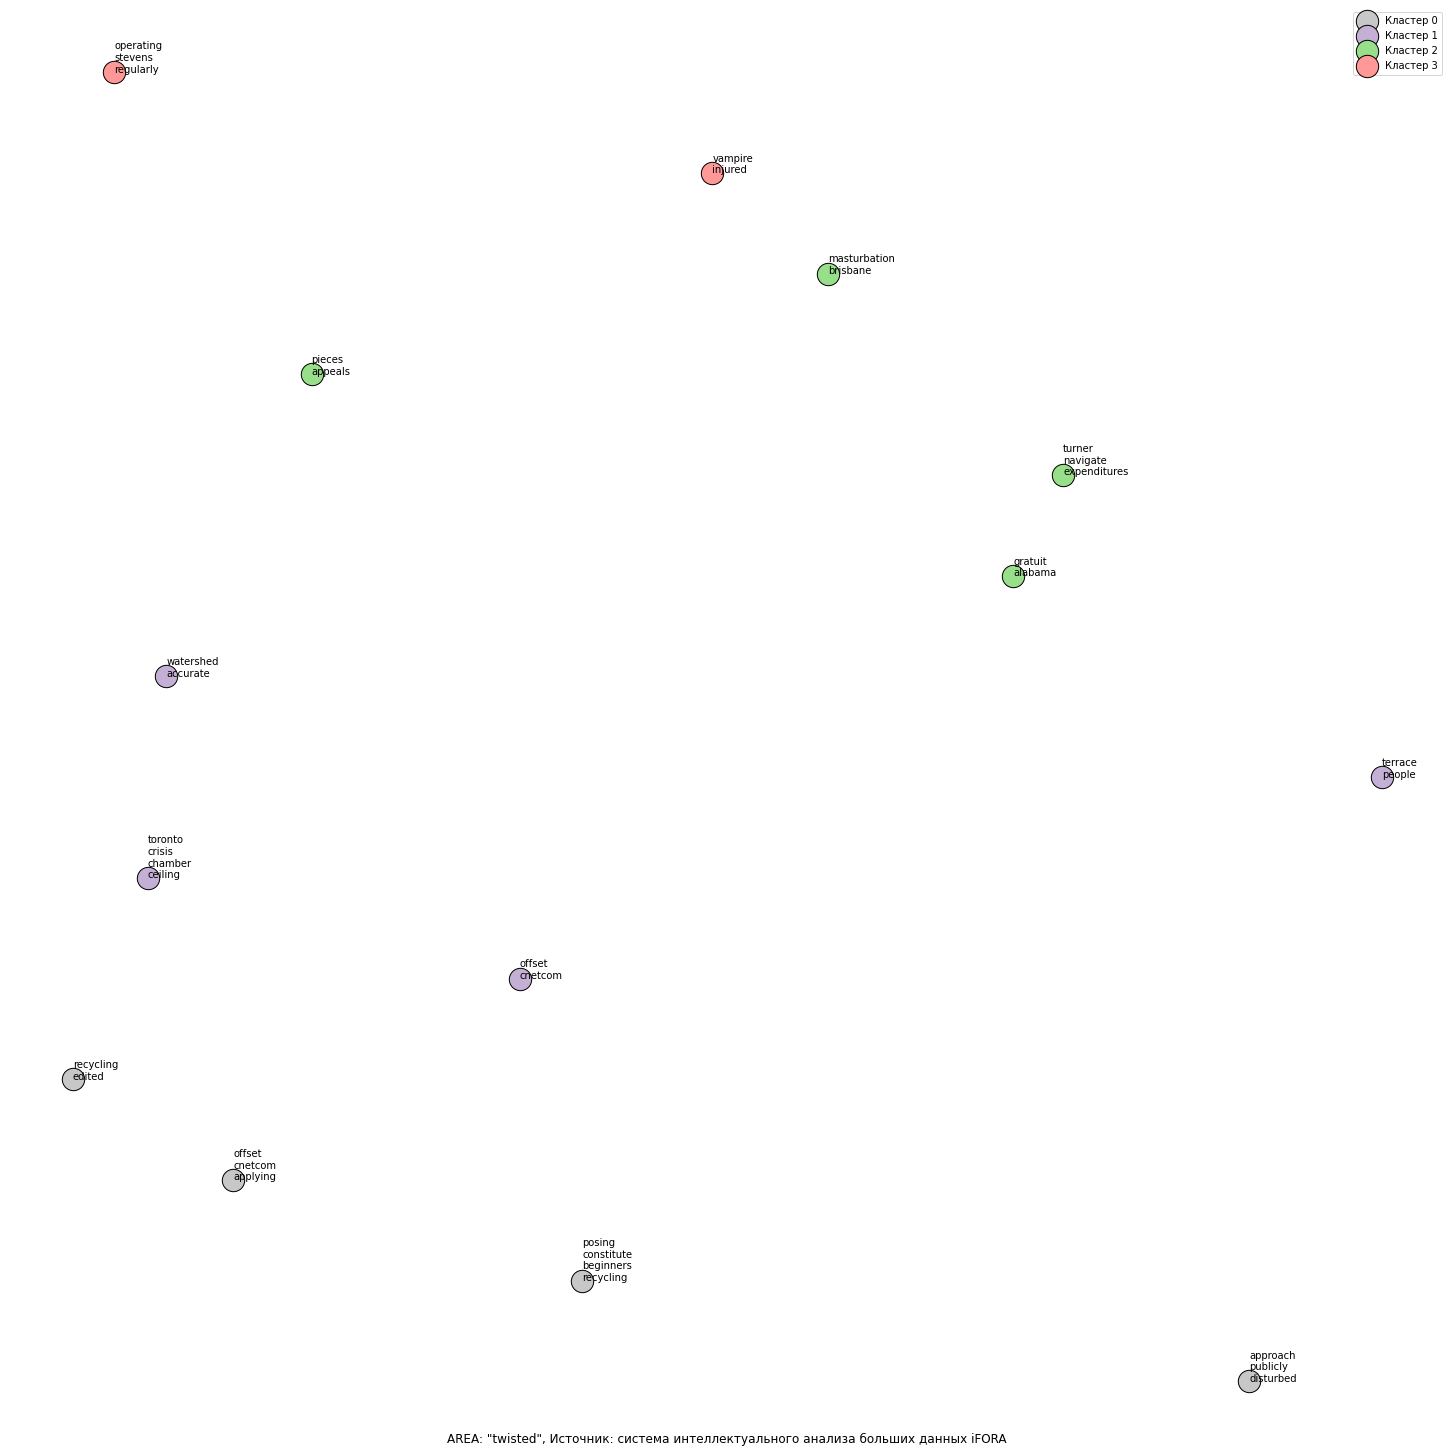

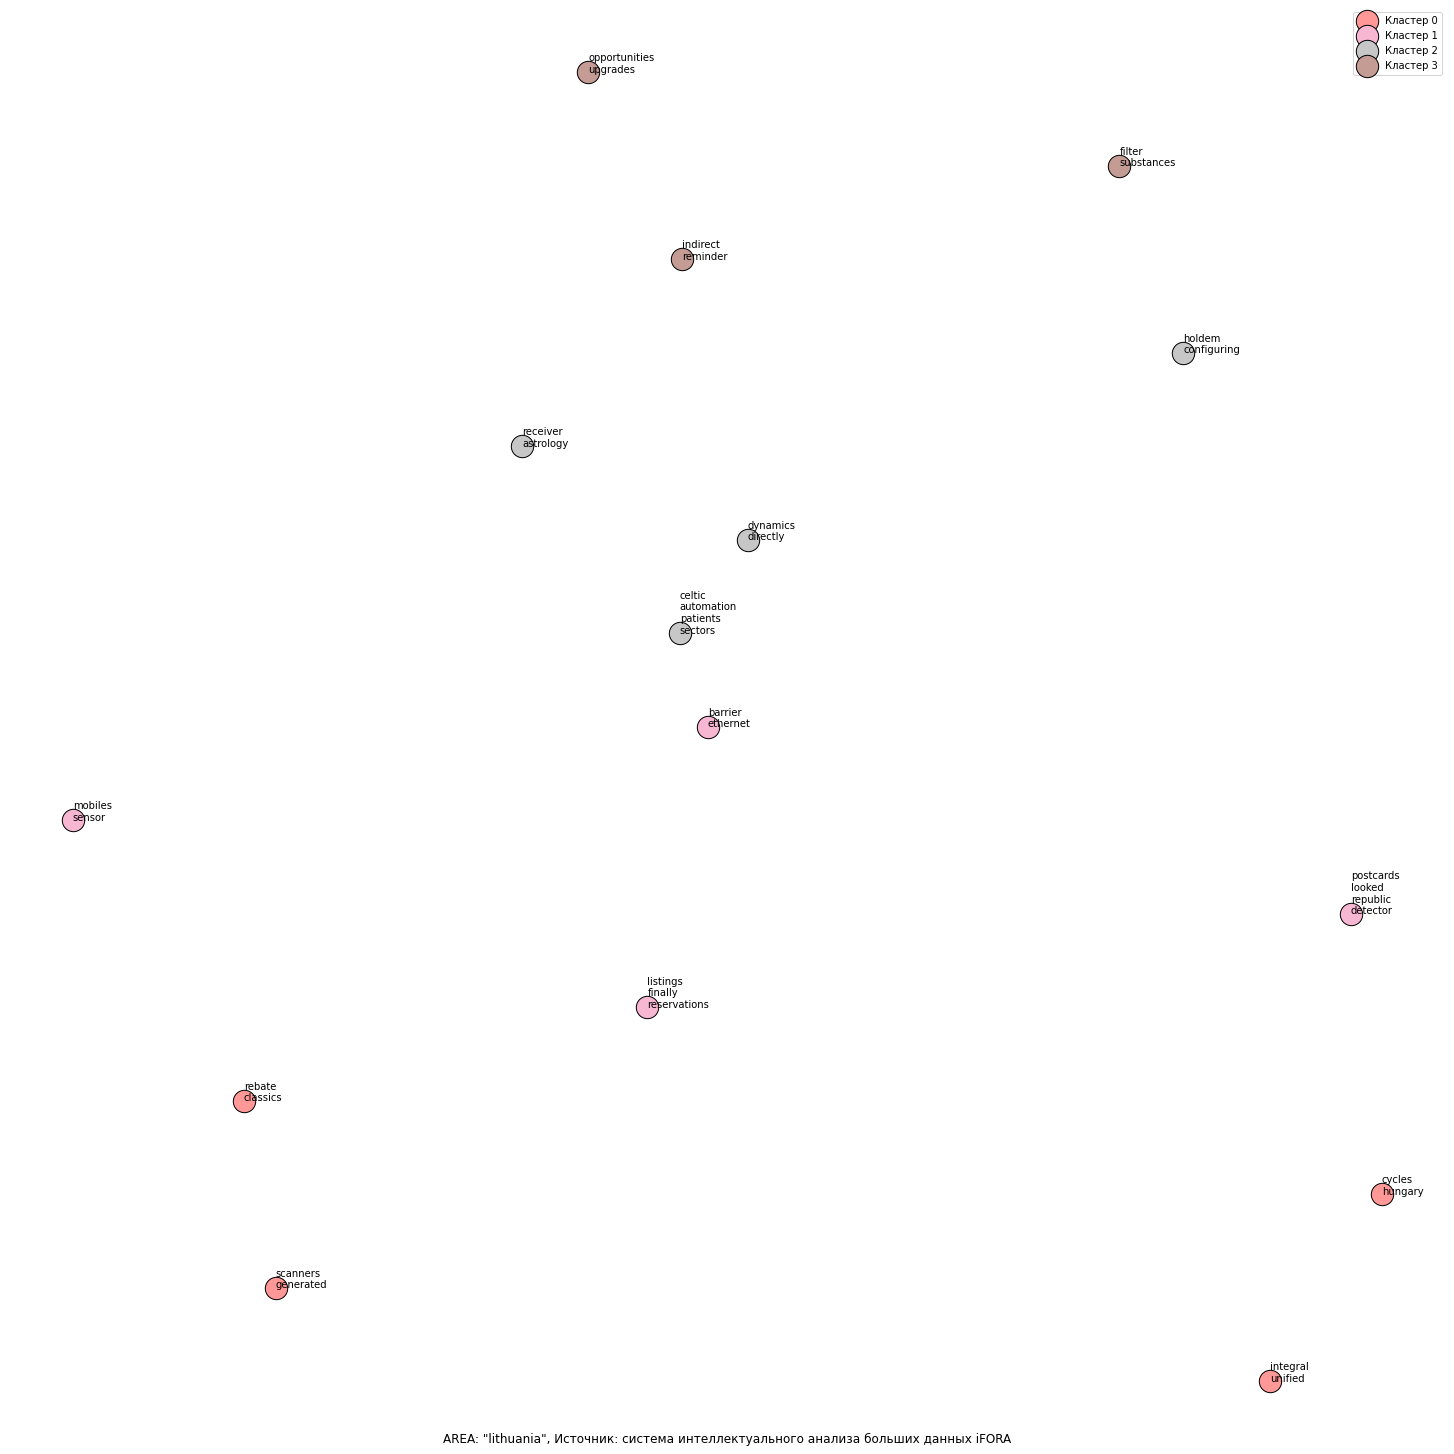

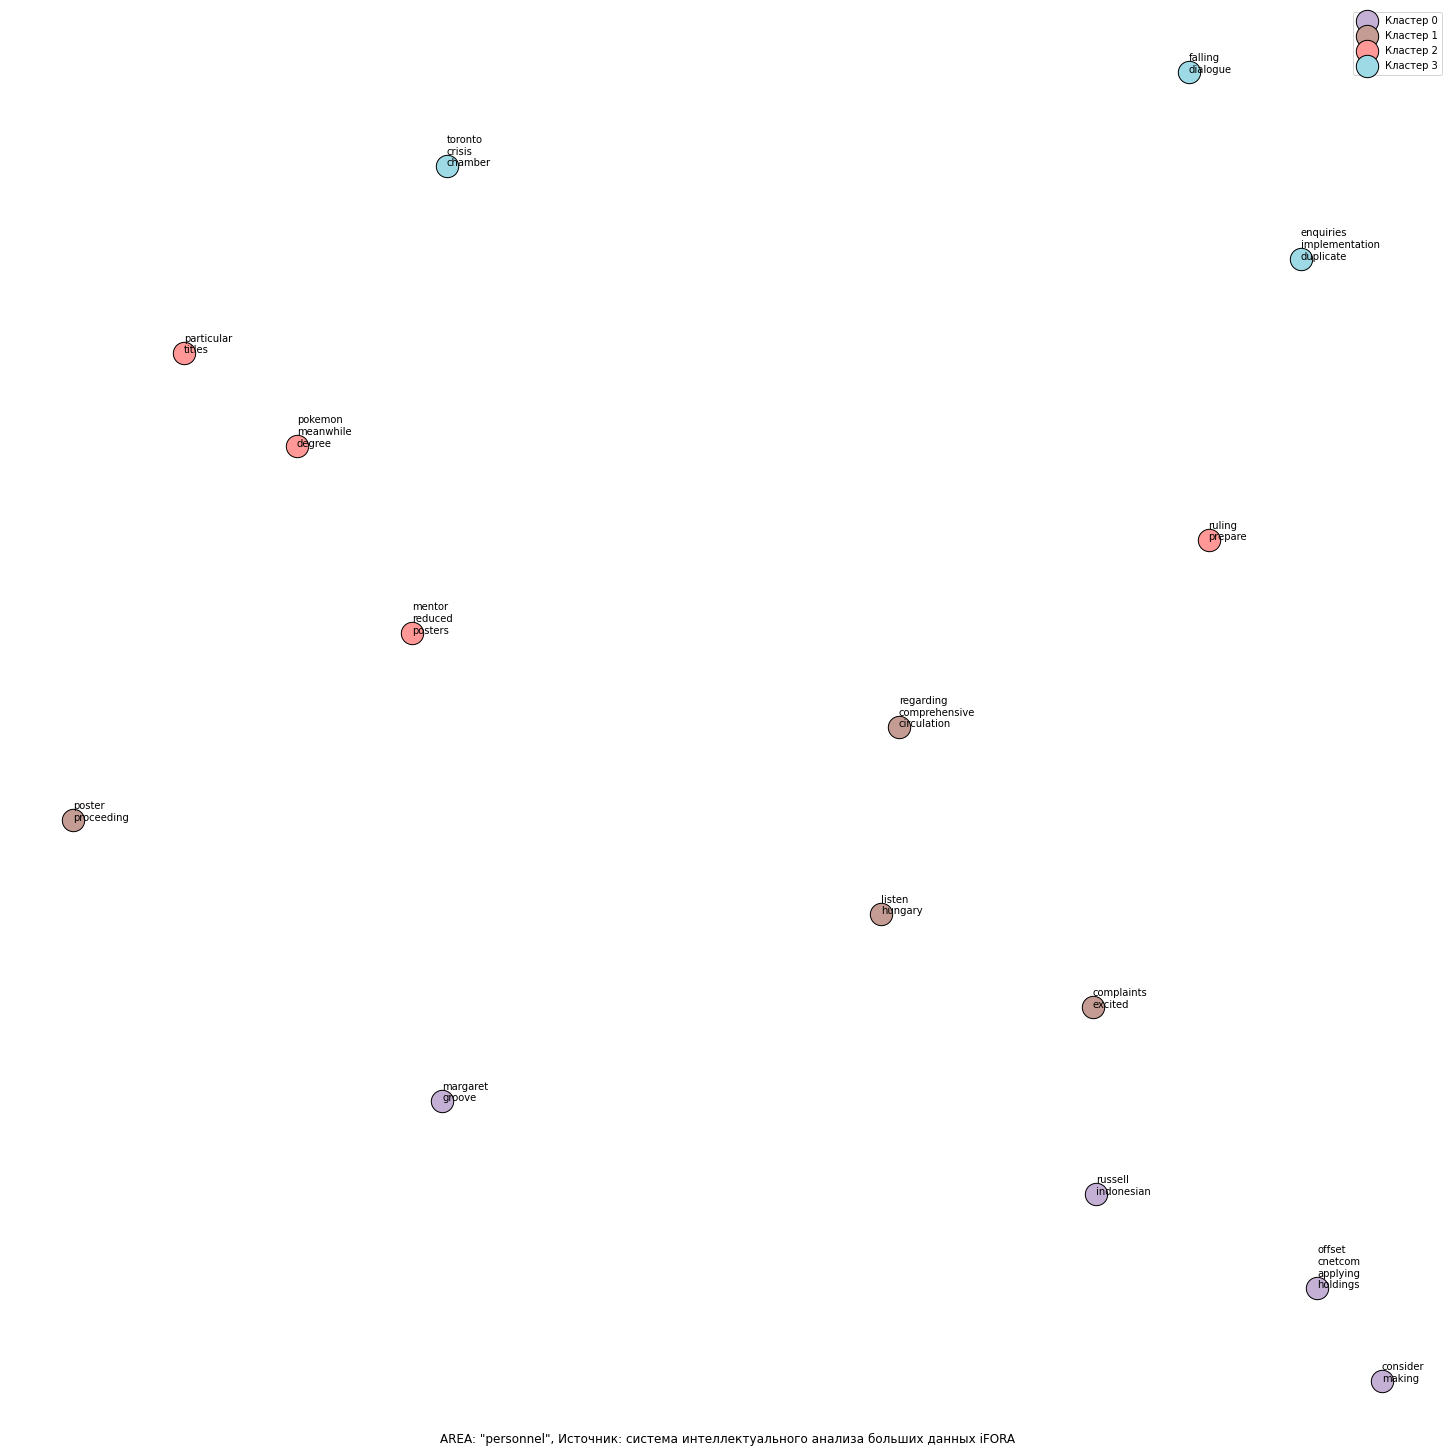

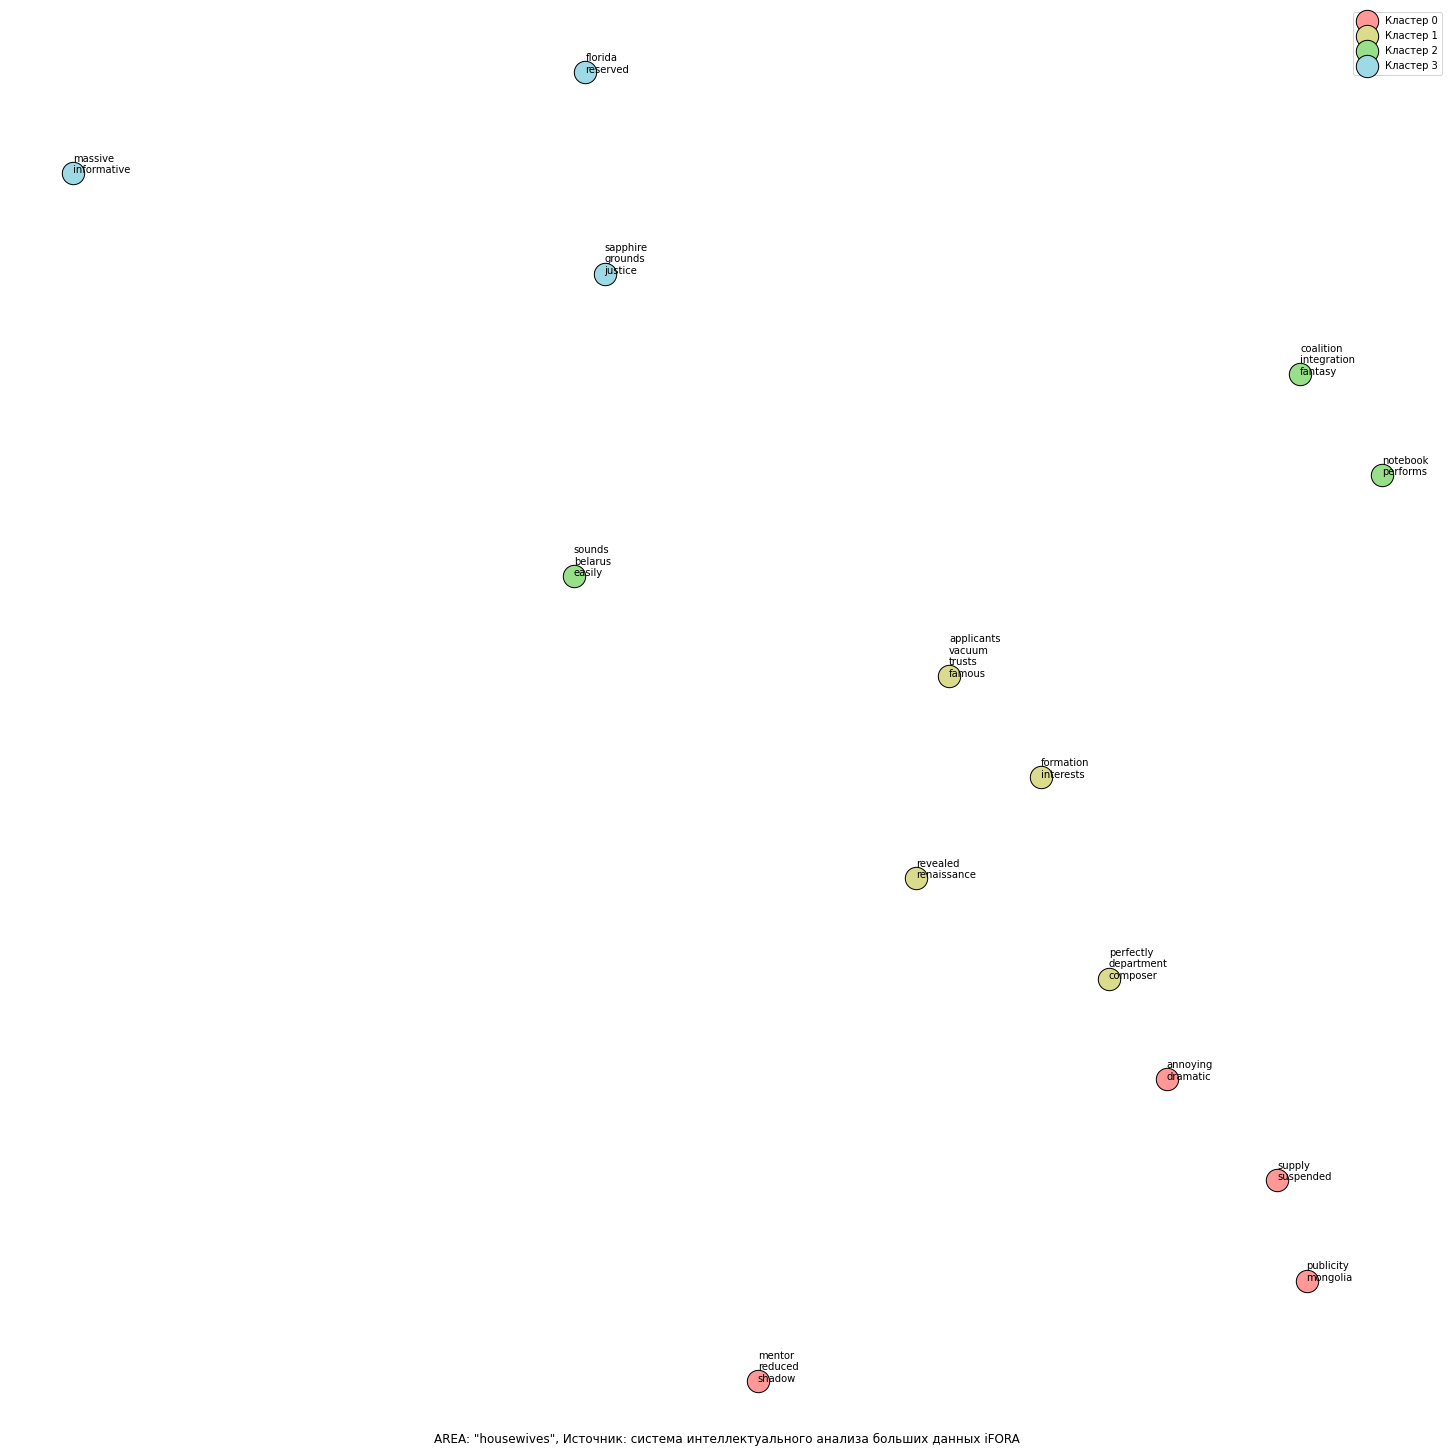

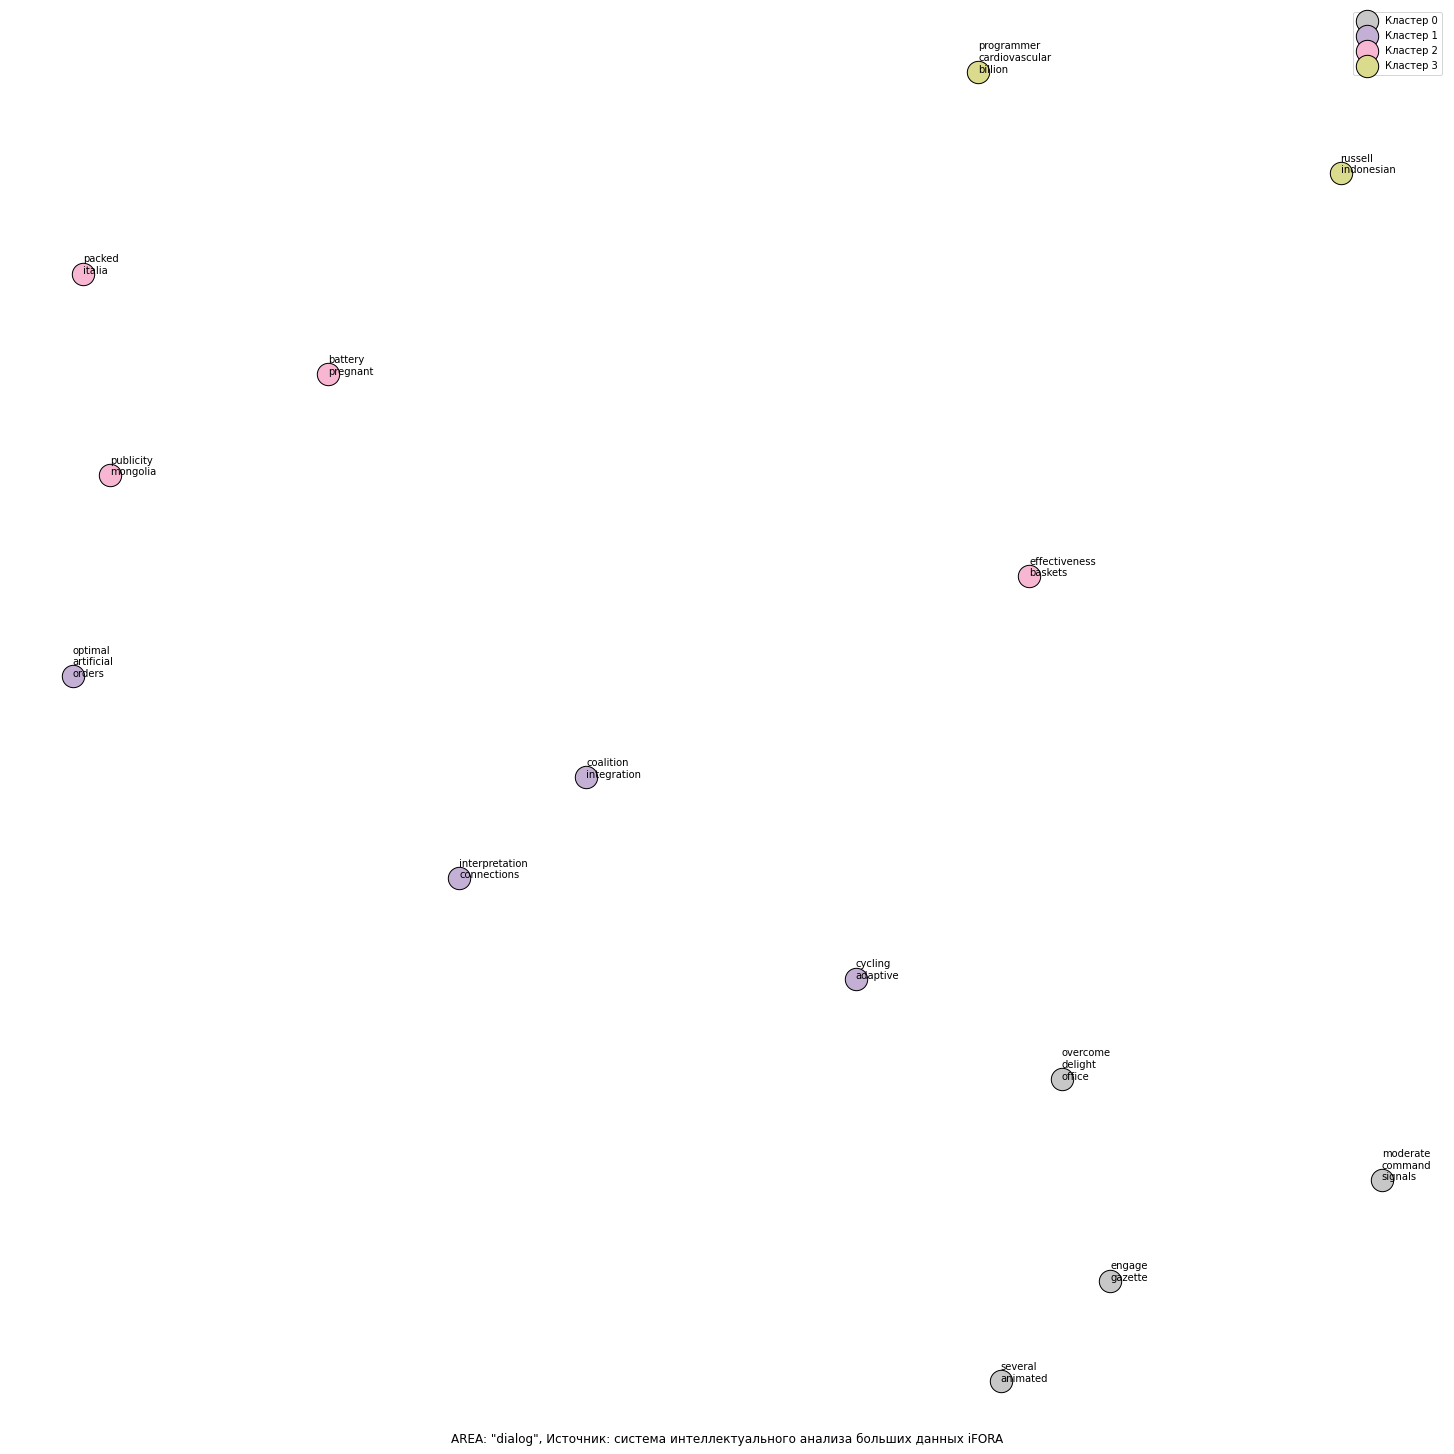

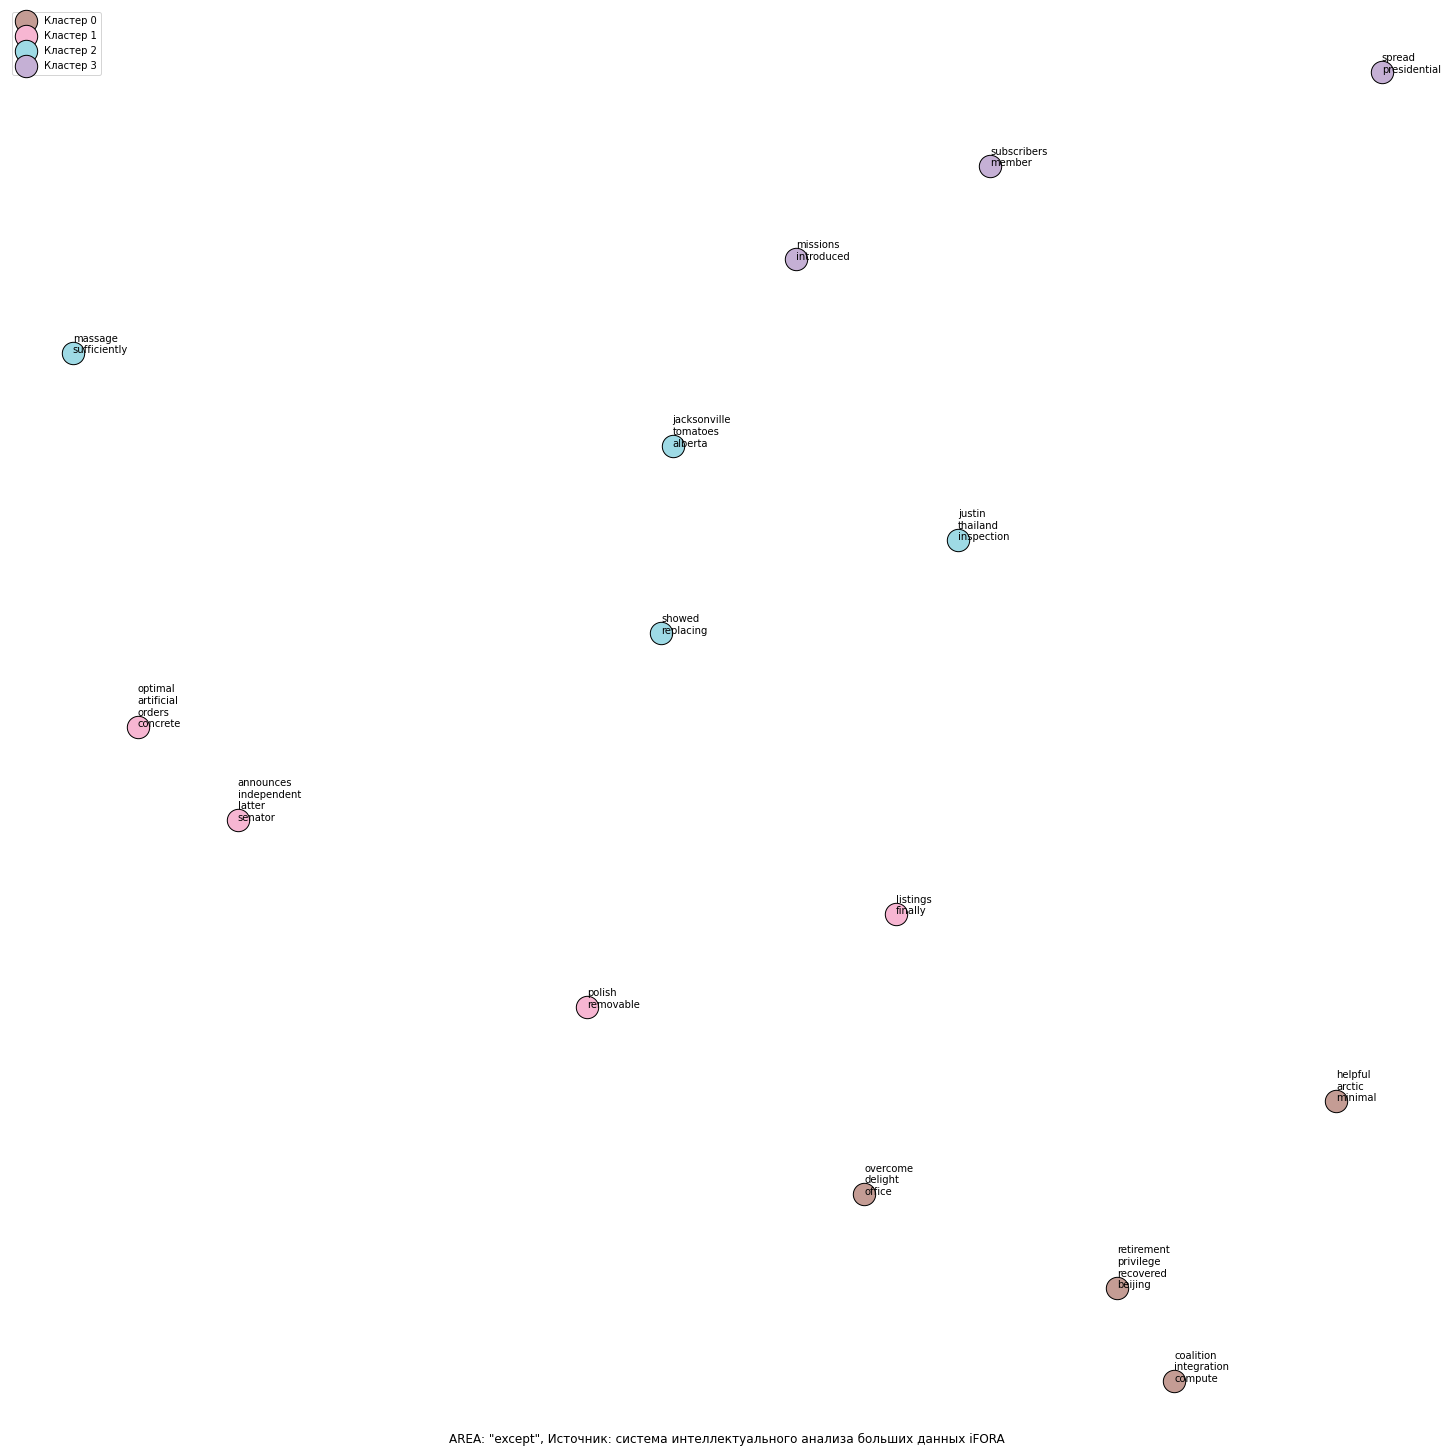

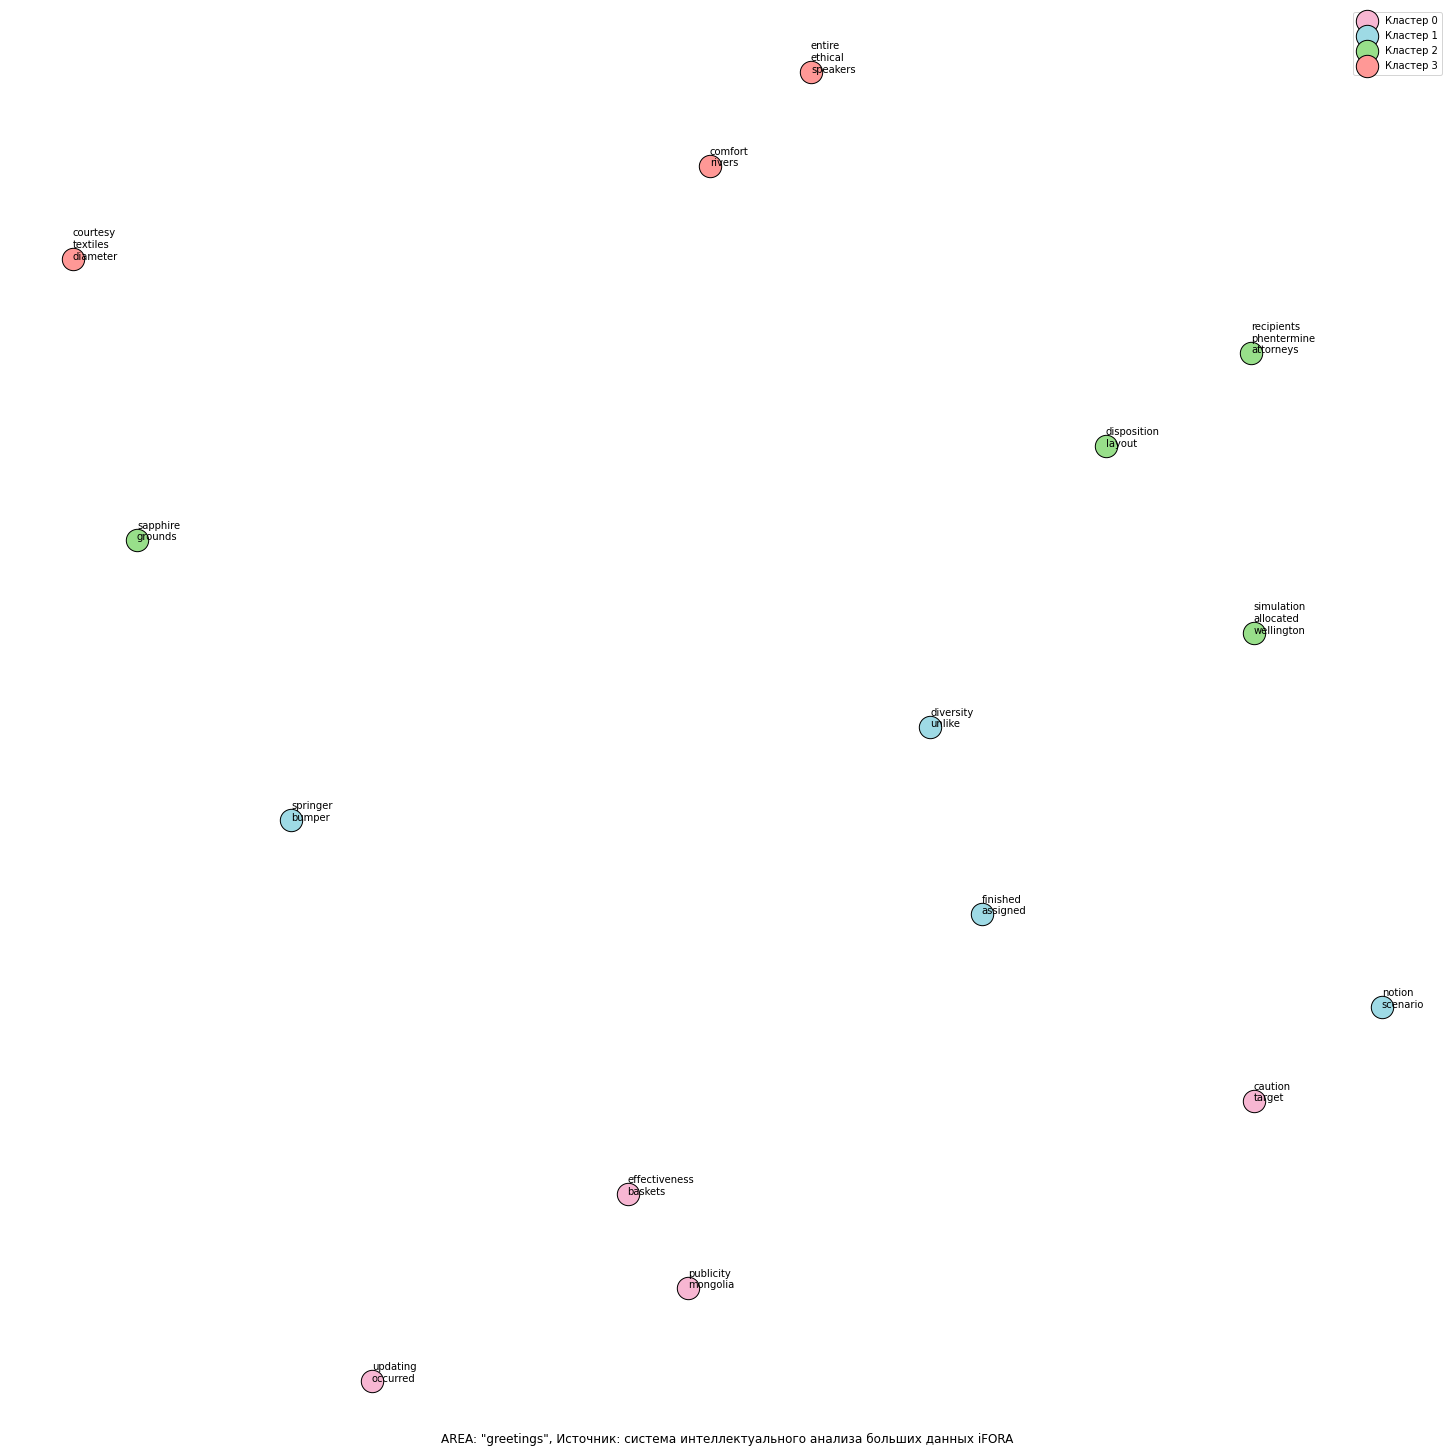

In [12]:
for area in areas:
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_axes([0,0,1,1])
    ax.set_axis_off()
    area_data = df[df['area'] == area]
    
    
    clusters_colors = {}
    for tup, col in colors_schema.items():
        if tup[0] == area:
            clusters_colors[tup[1]] = col


    for cluster, col in clusters_colors.items():
        ax.scatter(x="x", y="y", s=500, data=area_data[area_data['cluster_name'] == cluster],
                   color=col, edgecolor='k', label=cluster)
    
    
    for index, row in area_data.iterrows():
        word = row['keyword'].replace(' ', '\n')
        plt.text(row['x'], row['y'], word)
    ax.legend()
    ax.set_facecolor('white')
    plt.title(f'AREA: "{area}", Источник: система интеллектуального анализа больших данных iFORA', y=-0.001)
    plt.savefig(f'{area}.png', facecolor='white')
